In [20]:
import psycopg2 as psycopg2
from string import Template
import pylab

conn = psycopg2.connect(
    host="127.0.0.1",
    database="drugbank",
    user="drugbank",
    password="drugbank",
    port=5433)

    

In [21]:
### Process Data
drugCommunityDistribution={}
drugCommunities={}
for i in range(0,99):
    communityDistribution = {
    "V": set(), 
    "M": set(), 
    "D": set(), 
    "B": set(), 
    "S": set(), 
    "N": set(), 
    "L": set(), 
    "G": set(), 
    "J": set(), 
    "P": set(), 
    "A": set(), 
    "R": set(), 
    "C": set(), 
    "H": set() 
    } 

    cursor = conn.cursor()
    ### select drugbank desired resolution and version 

    t = """select drugs.name, drugs_resolution.modularity_class, drugs.atc_code as first_letter 
            FROM public.all_drugs_info as drugs
            LEFT JOIN public.drugs_resolution 
            ON drugs.name = drugs_resolution.name 
            WHERE CARDINALITY(atc_code) != 0 AND cardinality(drugs.gene_target_ids_array)!= 0 
                AND drugs_resolution.drugbank_version = '5.1.9'
                AND drugs_resolution.resolution = '2.0'
                AND drugs_resolution.modularity_class = '""" + str(i) + """'"""
#     print(t)
    #     t.format(modularityClass=modularityClass)
    cursor.execute(t, (i,))

    # display the PostgreSQL database server version
    drugs = cursor.fetchall()
    drugCommunities[i]=drugs
    # close the communication with the PostgreSQL
    cursor.close()

    for j in range(0,len(drugs)):
        for k in range(0, len(drugs[j][2])):
            atcCode = drugs[j][2][k]
            firstAtcLetter = atcCode[0:1]
            communityDistribution[firstAtcLetter].add(drugs[j][0])
            
    drugCommunityDistribution[i] = communityDistribution

        
    


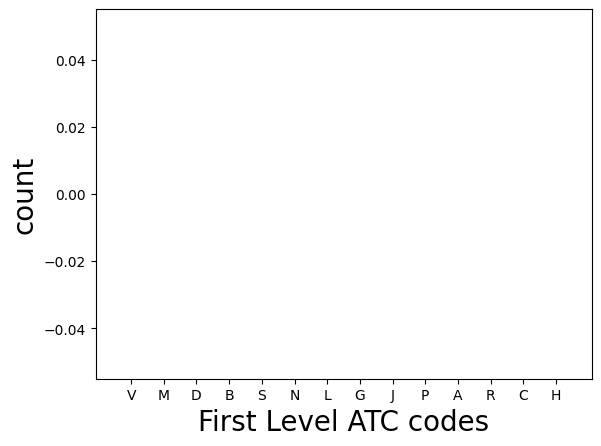

In [22]:
### Select class
modularity = 9
for key in drugCommunityDistribution[modularity]:
    pylab.bar(key,len(drugCommunityDistribution[modularity][key]))

# pylab.title("atc levels frequency")
pylab.xlabel("First Level ATC codes", fontsize=20)
pylab.ylabel("count", fontsize=20)

# print(drugCommunityDistribution[modularity]["C"])
# print(drugCommunities[modularity])
# print(len(drugCommunityDistribution[modularity]["R"]))
# print(len(drugCommunityDistribution[modularity]["N"]))

finalSet = set()

for key in drugCommunityDistribution[modularity]:
    finalSet = set.union(finalSet,drugCommunityDistribution[modularity][key])

pylab.savefig('community9.svg')
# print(finalSet)    
# print(len(finalSet))

In [14]:
excludedDrugsList = list()

maxCount = 0
maxKey = 'C'
for key in drugCommunityDistribution[modularity]:
#     print(key , len(drugCommunityDistribution[modularity][key]))
    if maxCount < len(drugCommunityDistribution[modularity][key]):
        maxCount = len(drugCommunityDistribution[modularity][key])
        maxKey = key

# print(maxCount)
print(maxKey)

### Get all the drugs that are not in the exclusion atc group

def myFunc(x):
  for val in drugCommunityDistribution[modularity][maxKey]:
      if x[0] == val:
        return False
  
  return True 

excludedDrugs = list(filter(myFunc, drugCommunities[modularity]))

# for x in excludedDrugs:
#   print(x)
for key in excludedDrugs:
    key = list(key)
    key.append(maxKey)
    key = tuple(key)
    excludedDrugsList.append(key)
#     print(key)
    
# type()

print(len(excludedDrugsList))
# 

# cursor = conn.cursor()x1
# t = """INSERT INTO public.drug_candidates(
# name, modularity_class, atc_code, target_atc)
# VALUES (excludedDrugs, ?, ?, ?)"""

# #     t.format(modularityClass=modularityClass)
# cursor.execute(t)

# # display the PostgreSQL database server version
# drugs = cursor.fetchall()
# drugCommunities[i]=drugs
# # close the communication with the PostgreSQL
# cursor.close()



C
0


{'V': set(), 'M': set(), 'D': set(), 'B': set(), 'S': set(), 'N': set(), 'L': set(), 'G': set(), 'J': set(), 'P': set(), 'A': set(), 'R': set(), 'C': set(), 'H': set()}


Text(0, 0.5, 'count')

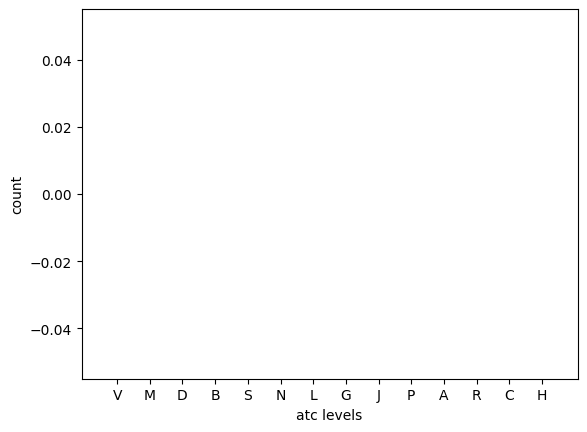

In [15]:
excludedCommunityDistribution = {
    "V": set(), 
    "M": set(), 
    "D": set(), 
    "B": set(), 
    "S": set(), 
    "N": set(), 
    "L": set(), 
    "G": set(), 
    "J": set(), 
    "P": set(), 
    "A": set(), 
    "R": set(), 
    "C": set(), 
    "H": set() 
    }
    
for x in excludedDrugs:
    for k in range(0, len(x[2])):
        atcCode = x[2][k]
        firstAtcLetter = atcCode[0:1]
        excludedCommunityDistribution[firstAtcLetter].add(x[0])

print(excludedCommunityDistribution)        
        
for key in excludedCommunityDistribution:
    pylab.bar(key,len(excludedCommunityDistribution[key]))
    
# pylab.title("atc levels frequency")
pylab.xlabel("atc levels")
pylab.ylabel("count")    

In [16]:
print(excludedCommunityDistribution)

{'V': set(), 'M': set(), 'D': set(), 'B': set(), 'S': set(), 'N': set(), 'L': set(), 'G': set(), 'J': set(), 'P': set(), 'A': set(), 'R': set(), 'C': set(), 'H': set()}


In [17]:
finalSetinio = set()
for key in excludedCommunityDistribution:
    finalSetinio = set.union(finalSet,excludedCommunityDistribution[key])
    

print(len(finalSetinio))

0
